In [15]:
import numpy as np
import pandas as pd
import random
from collections import defaultdict
import gym
import gym_minigrid
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
class QLearning:
    def __init__(self, actions, agent_indicator=10):
        self.actions = actions
        self.agent_indicator = agent_indicator
        self.alpha = 0.01
        self.gamma = 0.99
        self.epsilon = 0.2
        self.q_values = defaultdict(lambda: [0.0] * actions)

    def _convert_state(self, s):
        tiles = s.reshape(-1, 3)
        agent_idx = np.where(tiles[:, 0] == self.agent_indicator)[0][0]
        direction = tiles[agent_idx][2]  # 방향 정보
        return agent_idx * 4 + direction  # 고유한 state index 


    def update(self, state, action, reward, next_state, next_action):
        state = self._convert_state(state)
        next_state = self._convert_state(next_state)
        q_value = self.q_values[state][action]

        


        next_q_value = reward + self.gamma*np.max(self.q_values[next_state])

        td_error = next_q_value-q_value;

        self.q_values[state][action] = q_value + self.alpha*td_error

        return td_error
        ###########################################################################
    def act(self, state):
        #################### Write epsilion greedy code ###########################
        if np.random.rand() < self.epsilon:
          ## random하게 선택
            action = np.random.choice(self.actions)
        else:
            state = self._convert_state(state)
            q_values = self.q_values[state]
            action = np.argmax(q_values)
        ###########################################################################
        return action

    def real_act(self, state):
        state = self._convert_state(state)
        q_values = self.q_values[state]
        action = np.argmax(q_values)
        ###########################################################################
        return action
        

In [17]:
from utils import gen_wrapped_env, show_video

In [18]:
env = gen_wrapped_env('MiniGrid-Empty-6x6-v0')
#env = gen_wrapped_env('MiniGrid-DoorKey-5x5-v0')

obs = env.reset()

agent_position = obs[0]

agent = QLearning(3, agent_position)
# 0.99, 0.9 , 1 , 0.1, 0.5, 0.995
# 0 - turn left 1 - turn right 2 - forword 3 

In [19]:

# make a graph
rewards = []
mean_q_history = defaultdict(list)
max_q_history = defaultdict(list)
diff_q_history = []

td_error = []
first = 0;
for ep in range(30000):
    done = False
    obs = env.reset()
    action = agent.act(obs)

    td_errors_per_episode = 0  # 한 episode 동안의 td error
    ep_rewards = 0
    step_count = 0
    
    while not done:
        next_obs, reward, done, info = env.step(action)
        
        step_count += 1
        
        next_action = agent.act(next_obs)

        td_errors_per_episode += abs(agent.update(obs, action, reward, next_obs, next_action))  # 절댓값
    
                                     
        ep_rewards += reward
        obs = next_obs
        action = next_action
        

    if (first == 0 and ep_rewards != 0):
        first = ep
    
    rewards.append(ep_rewards)
    td_errors_per_episode /= step_count
    td_error.append(td_errors_per_episode)
    
    if (ep+1) % 20 == 0:
        print("episode: {}, rewards: {}".format(ep+1, ep_rewards))
        
    
    # Q값 기록 (100번마다)
    if (ep) % 100 == 0:
        total_q_diff = 0.0  #
        print(f"Episode {ep}")
        for s, q in agent.q_values.items():
            mean_q = round(np.mean(q), 5)
            max_q = round(np.max(q), 5)
            
            mean_q_history[s].append(mean_q)
            max_q_history[s].append(max_q)
    
            total_q_diff += (max_q - mean_q)  
        
        diff_q_history.append(round(total_q_diff, 5))  
        
        
            
env.close()

Episode 0
episode: 20, rewards: 0
episode: 40, rewards: 0
episode: 60, rewards: 0
episode: 80, rewards: 0
episode: 100, rewards: 0
Episode 100
episode: 120, rewards: 0
episode: 140, rewards: 0
episode: 160, rewards: 0
episode: 180, rewards: 0
episode: 200, rewards: 0
Episode 200
episode: 220, rewards: 0
episode: 240, rewards: 0
episode: 260, rewards: 0
episode: 280, rewards: 0
episode: 300, rewards: 0
Episode 300
episode: 320, rewards: 0
episode: 340, rewards: 0
episode: 360, rewards: 0
episode: 380, rewards: 0
episode: 400, rewards: 0
Episode 400
episode: 420, rewards: 0
episode: 440, rewards: 0
episode: 460, rewards: 0
episode: 480, rewards: 0
episode: 500, rewards: 0
Episode 500
episode: 520, rewards: 0
episode: 540, rewards: 0
episode: 560, rewards: 0
episode: 580, rewards: 0
episode: 600, rewards: 0
Episode 600
episode: 620, rewards: 0
episode: 640, rewards: 0
episode: 660, rewards: 0
episode: 680, rewards: 0
episode: 700, rewards: 0
Episode 700
episode: 720, rewards: 0
episode: 7

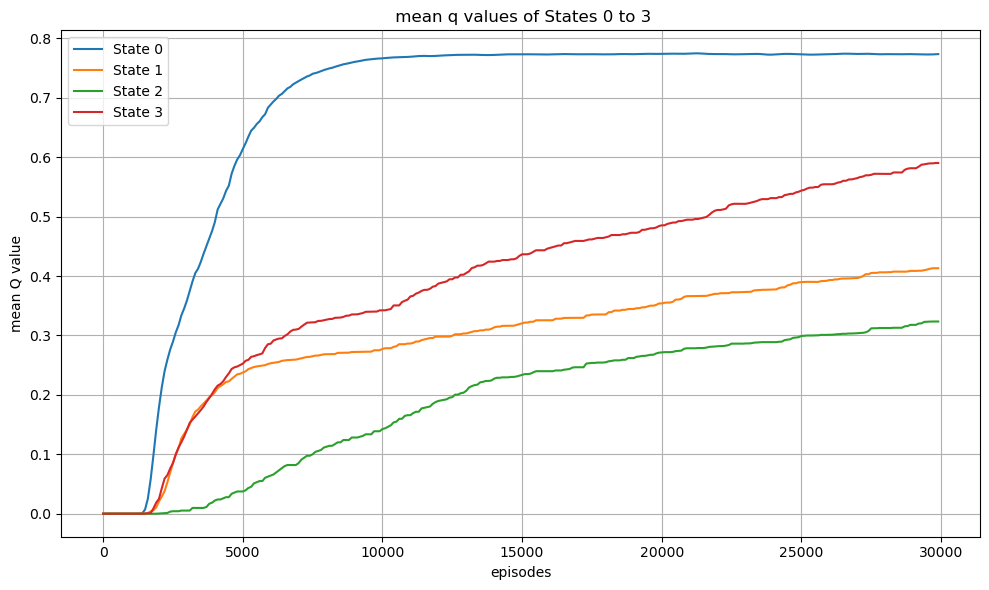

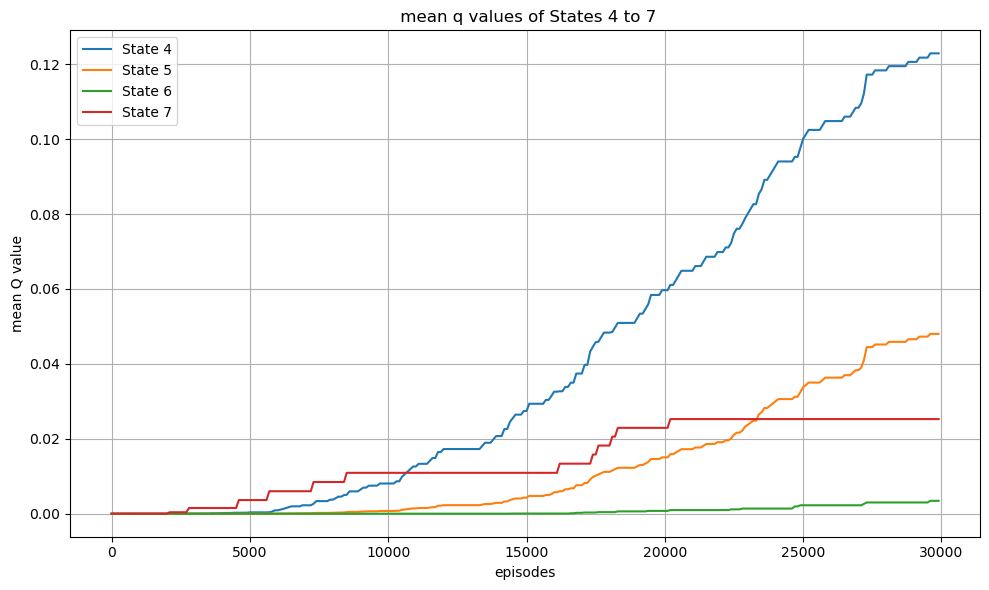

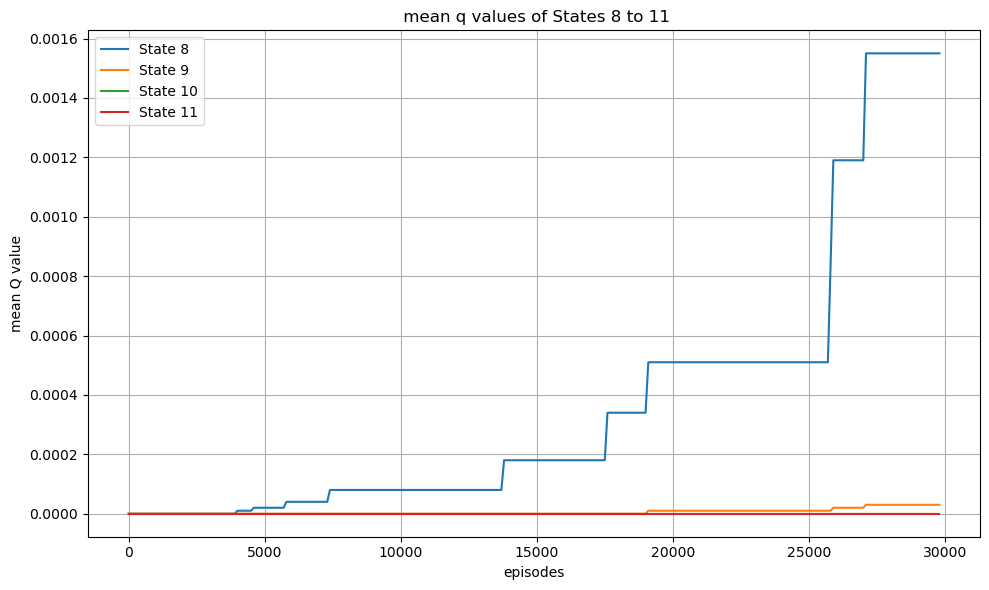

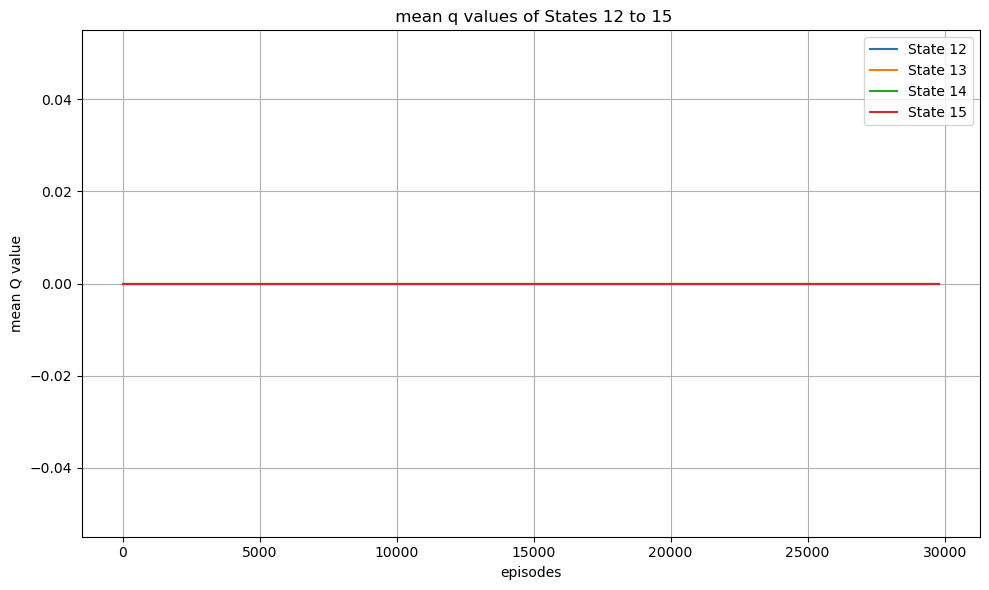

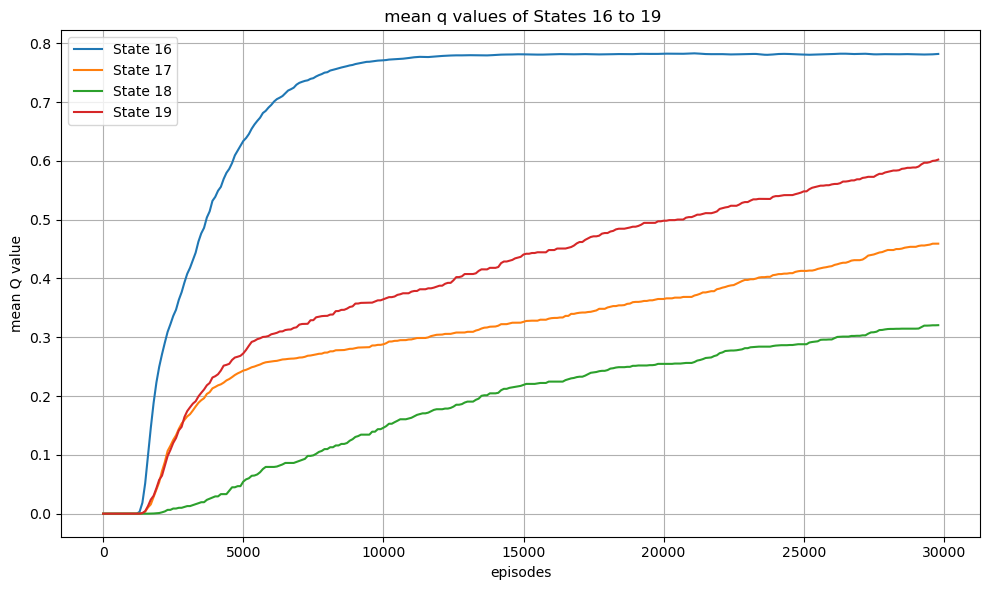

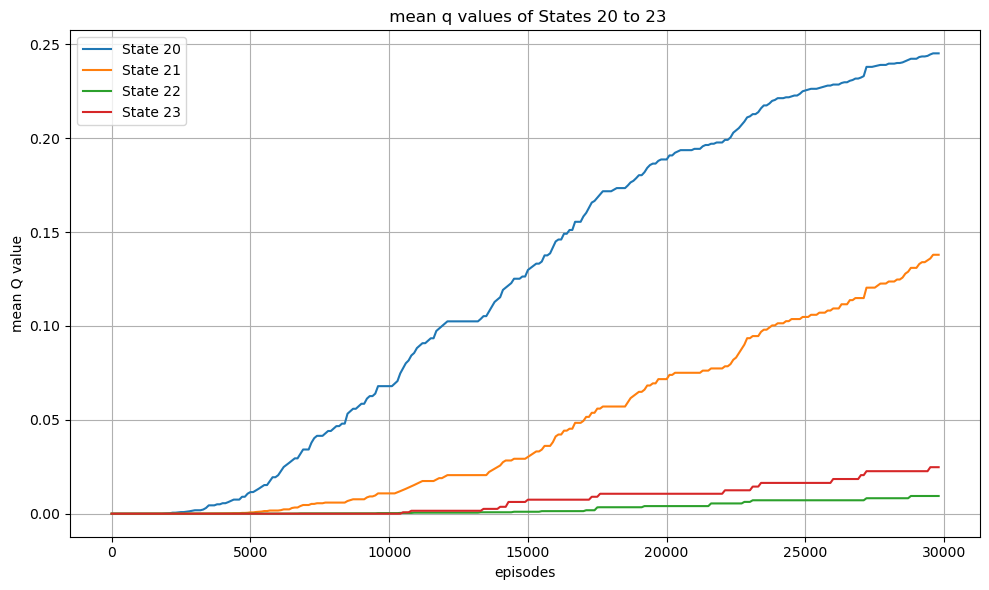

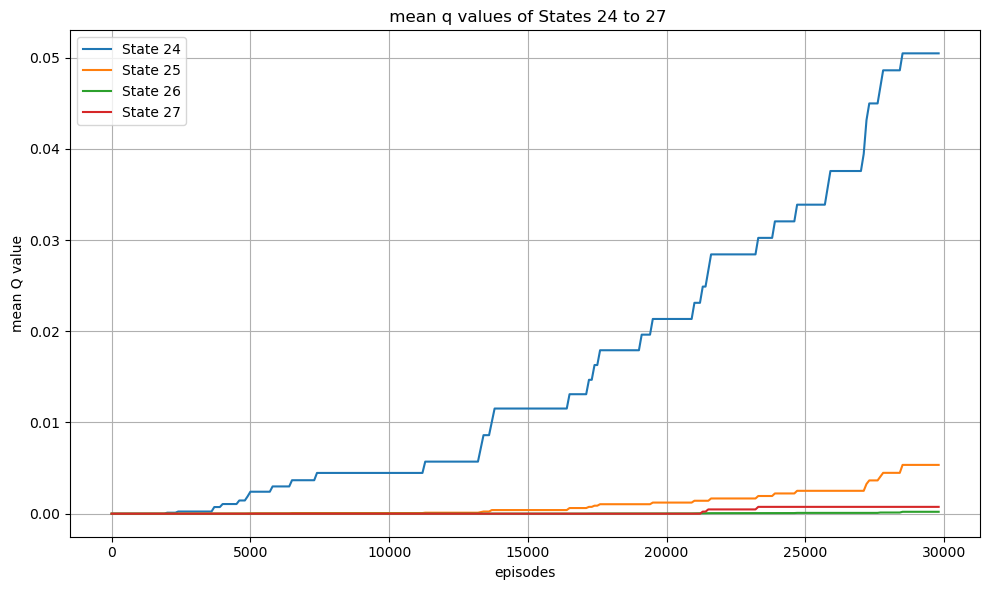

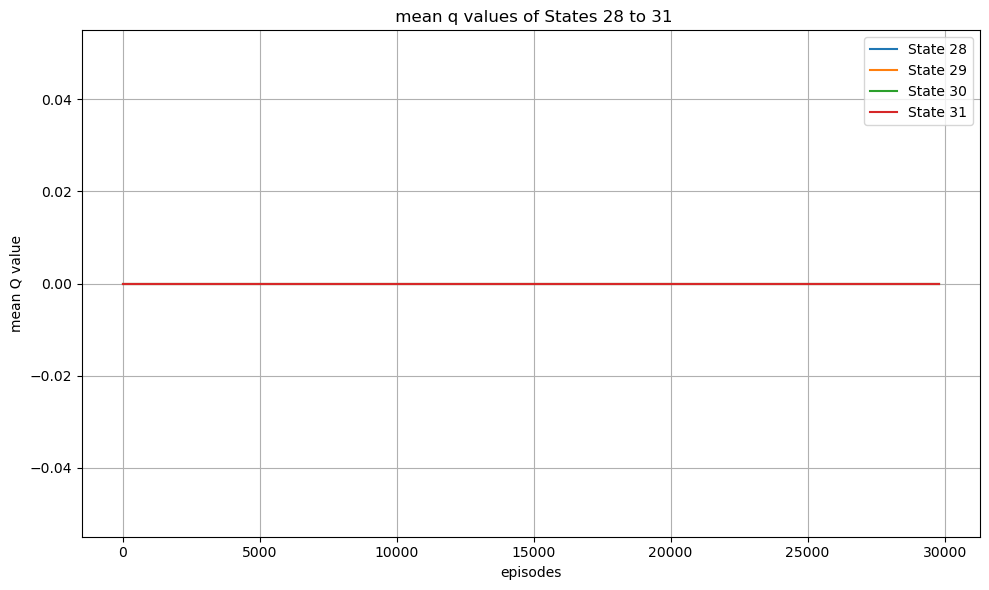

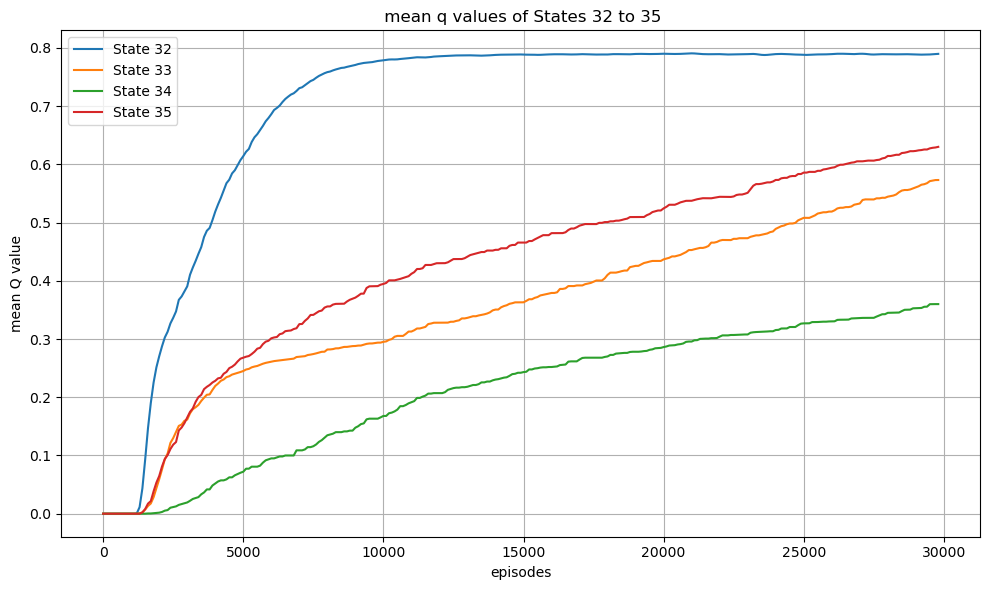

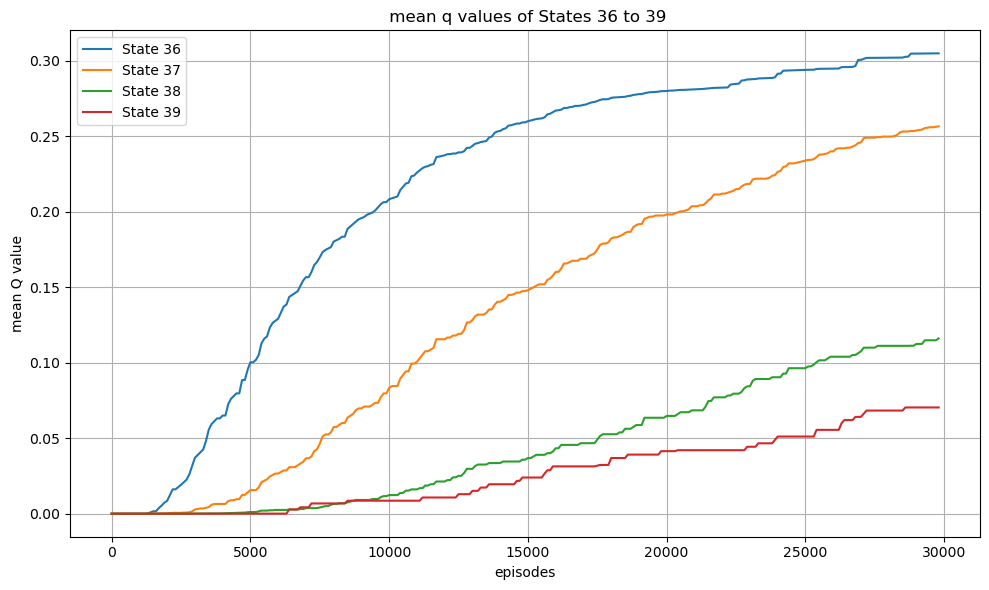

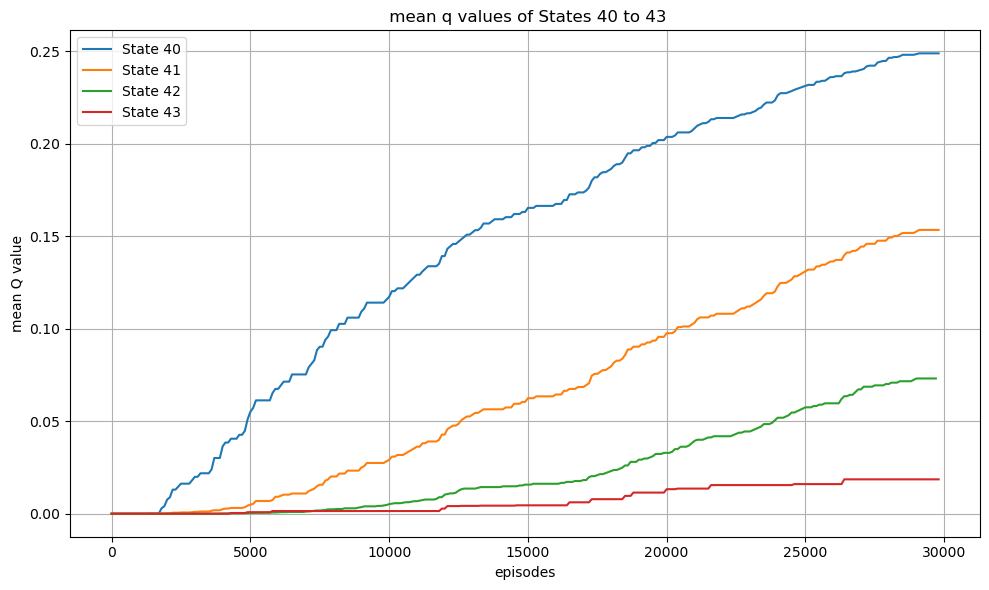

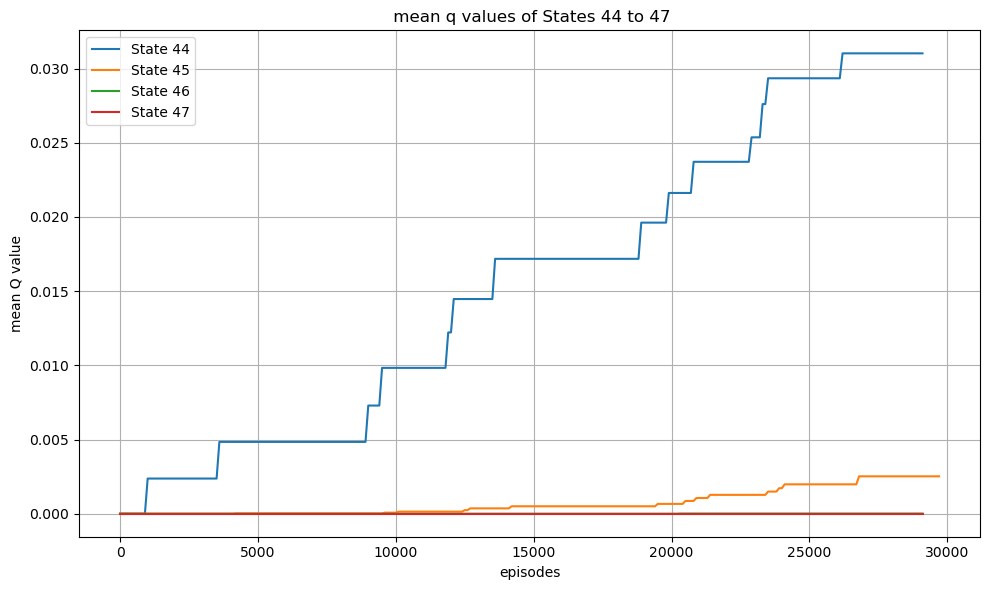

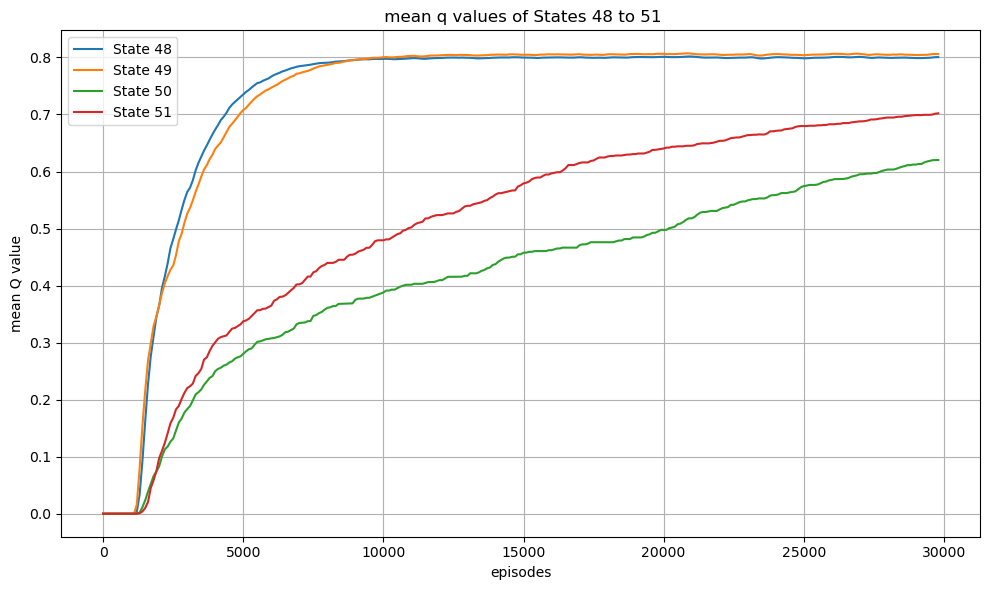

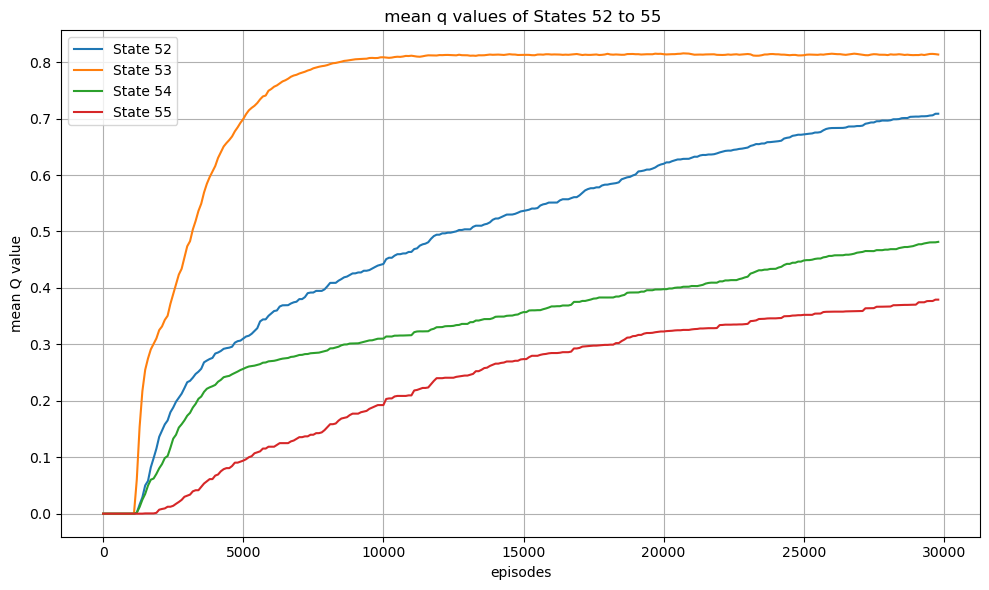

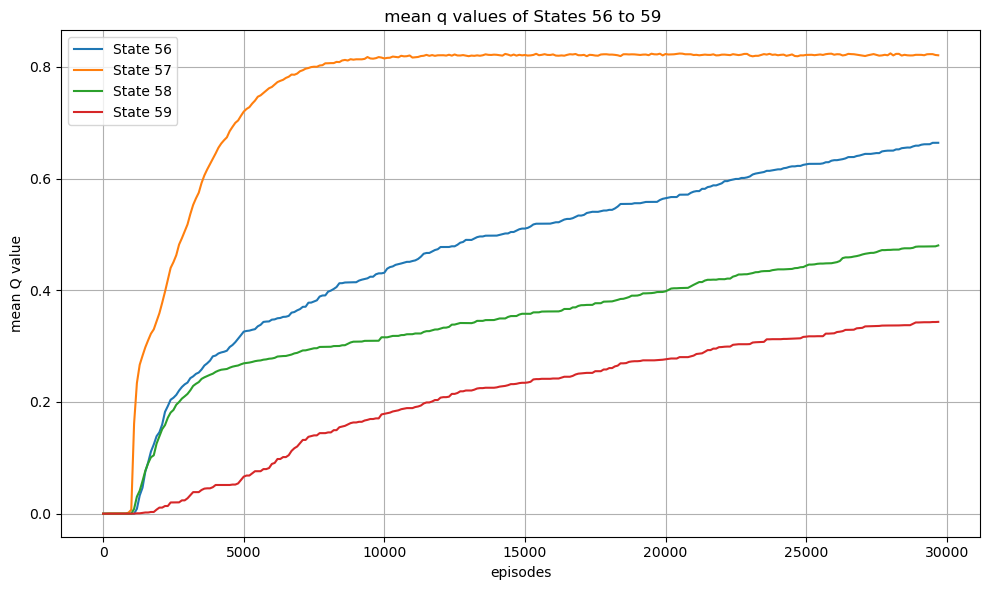

In [20]:


# state들을 정렬된 리스트로 가져오기
states = sorted(mean_q_history.keys())

# 4개씩 나눠서 그리기
for i in range(0, 60, 4):
    subset_states = states[i:i+4]
    
    plt.figure(figsize=(10, 6))
    
    for s in subset_states:
        x = np.arange(0, len(mean_q_history[s]) * 100, 100)
        plt.plot(x, mean_q_history[s], label=f"State {s}")
    
    plt.xlabel("episodes")
    plt.ylabel("mean Q value")
    plt.title(f" mean q values of States {subset_states[0]} to {subset_states[-1]}")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



In [21]:

#
#0 left, 1 right 2foward 
for i, (s, q) in enumerate(sorted(agent.q_values.items())):
    print(f"{i}: state={(s)}, Q={np.round(q, 5).tolist()}")


0: state=0, Q=[0.76808, 0.76813, 0.78528]
1: state=1, Q=[0.77556, 0.41908, 0.04496]
2: state=2, Q=[0.71832, 0.1642, 0.08802]
3: state=3, Q=[0.42738, 0.77552, 0.56806]
4: state=4, Q=[0.00266, 0.00468, 0.36133]
5: state=5, Q=[0.14364, 0.00038, 0.0]
6: state=6, Q=[0.00904, 0.00129, 1e-05]
7: state=7, Q=[1e-05, 0.0, 0.07577]
8: state=8, Q=[0.0, 0.0, 0.00464]
9: state=9, Q=[9e-05, 0.0, 0.0]
10: state=10, Q=[0.0, 0.0, 0.0]
11: state=11, Q=[0.0, 0.0, 0.0]
12: state=12, Q=[0.0, 0.0, 0.0]
13: state=13, Q=[0.0, 0.0, 0.0]
14: state=14, Q=[0.0, 0.0, 0.0]
15: state=15, Q=[0.0, 0.0, 0.0]
16: state=16, Q=[0.77597, 0.77581, 0.79389]
17: state=17, Q=[0.78352, 0.42249, 0.17636]
18: state=18, Q=[0.72057, 0.13218, 0.10945]
19: state=19, Q=[0.40998, 0.7839, 0.61569]
20: state=20, Q=[0.00325, 0.02142, 0.71256]
21: state=21, Q=[0.41854, 0.00043, 0.00053]
22: state=22, Q=[0.02805, 0.00024, 1e-05]
23: state=23, Q=[1e-05, 0.06656, 0.00775]
24: state=24, Q=[1e-05, 0.00015, 0.15124]
25: state=25, Q=[0.01605, 1e-0

In [22]:
show_video()

In [24]:
import os
from gym.wrappers.monitoring.video_recorder import VideoRecorder

str = input("gamma?")

gamma = str
def run_and_record_legacy(env_id="MiniGrid-Empty-6x6-v0", output_dir="./videos", policy=None):
    # 저장 폴더 만들기
    os.makedirs(output_dir, exist_ok=True)
    output_path = os.path.join(output_dir, str+"minigrid_run_q.mp4")

    # 환경 만들기
    env = gen_wrapped_env(env_id)

    # 비디오 레코더 설정
    video_recorder = VideoRecorder(env, path=output_path)

    # 초기화
    obs = env.reset()
    action = agent.act(obs)
    done = False

    while not done:
        video_recorder.capture_frame() 

        next_obs, reward, done, info = env.step(action)
        next_action = agent.act(next_obs)

        obs = next_obs
        action = next_action

    video_recorder.close()
    env.close()

    print(output_path)

run_and_record_legacy()

gamma? 0.99


./videos/0.99minigrid_run_q.mp4


In [25]:
with open('./data/'+gamma+'rewards_qlearning.csv', 'w') as f:
    ...

pd.Series(rewards).to_csv('./data/'+gamma+'rewards_qlearning.csv')


with open('./data/'+gamma+'td_error_qlearning.csv', 'w') as f:
    ...

pd.Series(td_error).to_csv('./data/'+gamma+'td_error_qlearning.csv')


with open('./data/state_'+gamma+'meanQ_qlearning.csv', 'w') as f:
    ...

pd.Series(mean_q_history).to_csv('./data/state_'+gamma+'meanQ_qlearning.csv')

with open('./data/state_'+gamma+'maxQ_qlearning.csv', 'w') as f:
    ...

pd.Series(max_q_history).to_csv('./data/state_'+gamma+'maxQ_qlearning.csv')

with open('./data/state_'+gamma+'diffQ_qlearning.csv', 'w') as f:
    ...

pd.Series(diff_q_history).to_csv('./data/state_'+gamma+'diffQ_qlearning.csv')

In [26]:
q_logs = pd.read_csv('./data/'+gamma+'rewards_qlearning.csv', index_col=False).iloc[:, 1]
q_td_logs = pd.read_csv('./data/'+gamma+'td_error_qlearning.csv', index_col=False).iloc[:, 1]

387


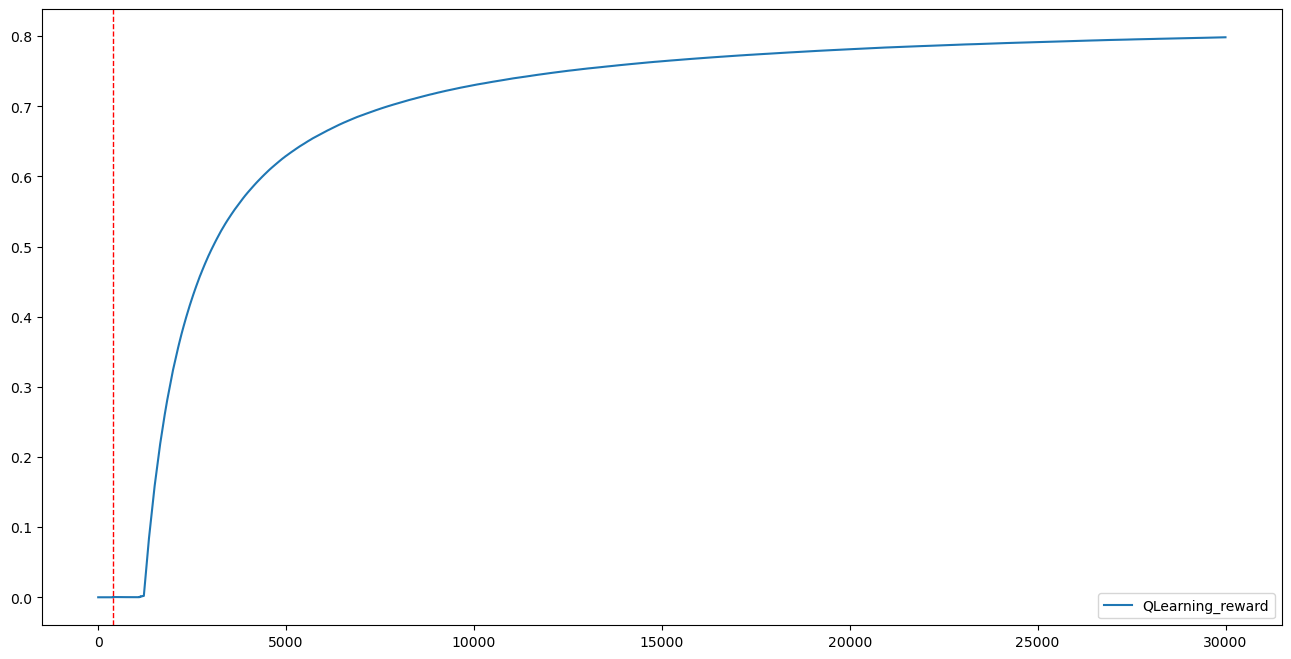

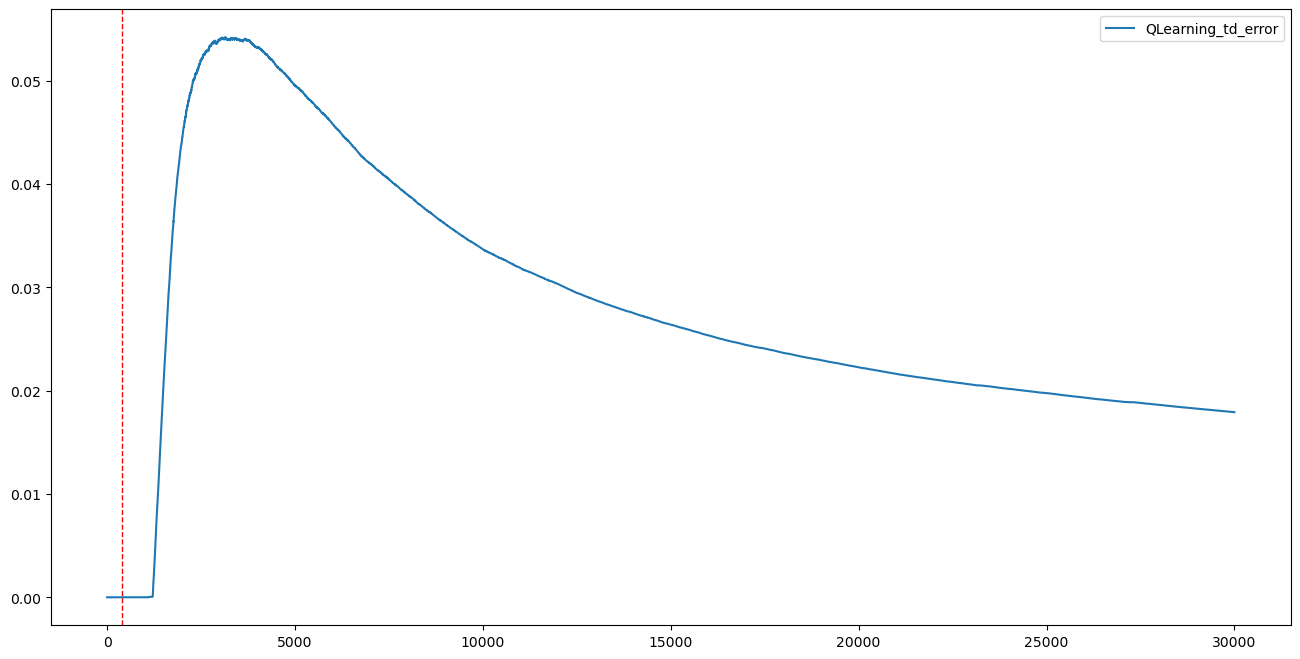

In [27]:
print(first)

plt.figure(figsize=(16, 8))
plt.plot(q_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning_reward")
# plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.axvline(x=first, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.show()


#td_err0r
plt.figure(figsize=(16, 8))
plt.plot(q_td_logs.cumsum() / (pd.Series(np.arange(q_logs.shape[0]))+1), label="QLearning_td_error")
# plt.plot(sarsa_logs.cumsum() / (pd.Series(np.arange(sarsa_logs.shape[0]))+1), label="SARSA")
plt.axvline(x=first, color='red', linestyle='--', linewidth=1)
plt.legend()
plt.show()